In [2]:
# I am not sure how to build the libraries within the function
# I just have to make sure to import the libraries before running the function

import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot, pylab
import statsmodels.formula.api as smf


%matplotlib inline

In [3]:
def lm(x, y):
    '''calculate the linear regression from the choosen variables
    input: independent variable (x), and dependent variable (y)
    output: linear model'''
    
    # using assert to make sure the base conditions are met before running the function
    # base conditions are x and y should have at least two values and the dataset should not be empty
    assert len(x) > 1, 'Independent variable (x) should have at least two values'
    assert len(y) > 1, 'Dependent variable (y) should have at least two values'
    
    # once the base conditions were met, we run linear regression from the input dataset and it's x and y variables
    linear_model = sm.formula.ols(formula = 'y ~ x', data = data).fit()
    
    # generate a data frame using pandas to produce a list of numbers from 1 to the same length as the x variable
    newx = pd.DataFrame({'newdata' : range(1,len(x)+1)})
    
    # using the .predict to predict the y based on x
    y_preds = linear_model.predict(newx)
    
    # print the summary of the linear model
    print(linear_model.summary())
    

In [4]:
def mm():
    '''calculate the multiple regression from the dataset
    Output: multiple regression model'''
    x = data[['Temperature','Rain']]
    y = data['NDVI']
    X = sm.add_constant(x)
    multiple_regression = sm.OLS(y, X).fit()
    
    print(multiple_regression.summary())

In [5]:
def mm_interation():
    '''calculate the interaction in the multiple regression
    Outout: Interaction terms'''
    interaction = smf.ols(formula = 'NDVI ~ Temperature * Rain', data=data).fit()
    
    print(interaction.summary())

In [6]:
def lm_plot(x,y):
    '''plot the choosen variables with abline line (regression line, or line of best fit)
    Input:independent variable (x), and dependent variable (y)
    Output: Scatter plot based on the input variables and the line of best fit'''

    X = sm.add_constant(x)
    linear_model = sm.formula.OLS(y, X).fit()
    
    x_pred = np.linspace(x.min(),x.max(), 30)
    
    x_pred2 = sm.add_constant(x_pred)
    
    y_preds = linear_model.predict(x_pred2)
    
    pyplot.plot(x_pred, y_preds, color='k', linewidth = 2)
    
    return pyplot.plot()
    
    

In [7]:
def plot(x, y):
    '''plot the choosen variables
    Input:independent variable (x), and dependent variable (y)
    Output: Scatter plot based on the input variables'''
    plot = pyplot.scatter(x,y)
    lm_plot(x,y)
    pylab.xlabel(x.name, fontsize=12)
    pylab.ylabel(y.name, fontsize=12)
    
    pyplot.show()

In [8]:
# loading the data
data = pd.read_csv('../data/condense_data.csv', sep=',')

In [9]:
# calculate the linear model by using the lm function
lm(data['Year'],data['NDVI'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sun, 15 Nov 2015   Prob (F-statistic):            0.00331
Time:                        19:03:56   Log-Likelihood:                 53.577
No. Observations:                  31   AIC:                            -103.2
Df Residuals:                      29   BIC:                            -100.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9040      1.782     -2.753      0.0

In [10]:
# calculate the multiple regression using the mm function
mm()

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.2998
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.743
Time:                        19:04:07   Log-Likelihood:                 49.217
No. Observations:                  31   AIC:                            -92.43
Df Residuals:                      28   BIC:                            -88.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.9556      0.242      3.946      

In [11]:
# calculate the interaction in the multiple regression 
mm_interation()

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9868
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.414
Time:                        19:04:25   Log-Likelihood:                 50.501
No. Observations:                  31   AIC:                            -93.00
Df Residuals:                      27   BIC:                            -87.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            2.8224      1.245  

/Users/billyhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


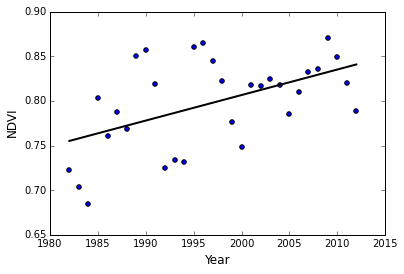

In [12]:
# plotting the Year vs NDVI using the plot function
plot(data['Year'],data['NDVI'])